In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.targets
df =  pd.DataFrame(data = X, columns = y)
df.shape

(581012, 52)

In [ ]:
df.head(10)

,,,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2606,45,7,270,5,633,222,225,138,6256,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2605,49,4,234,7,573,222,230,144,6228,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2617,45,9,240,56,666,223,221,133,6244,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2612,59,10,247,11,636,228,219,124,6230,1,0,0,...,0,0,0,0,0,0,0,0,0,5


PART I

---


In [ ]:
#missing values
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#number of types
df["Cover_Type"].nunique()

7

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


PART II

---




In [ ]:
y = df["Cover_Type"]
X =df.drop(columns = ["Cover_Type"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, model.predict(X_test))
print(acc)

0.553522714559865


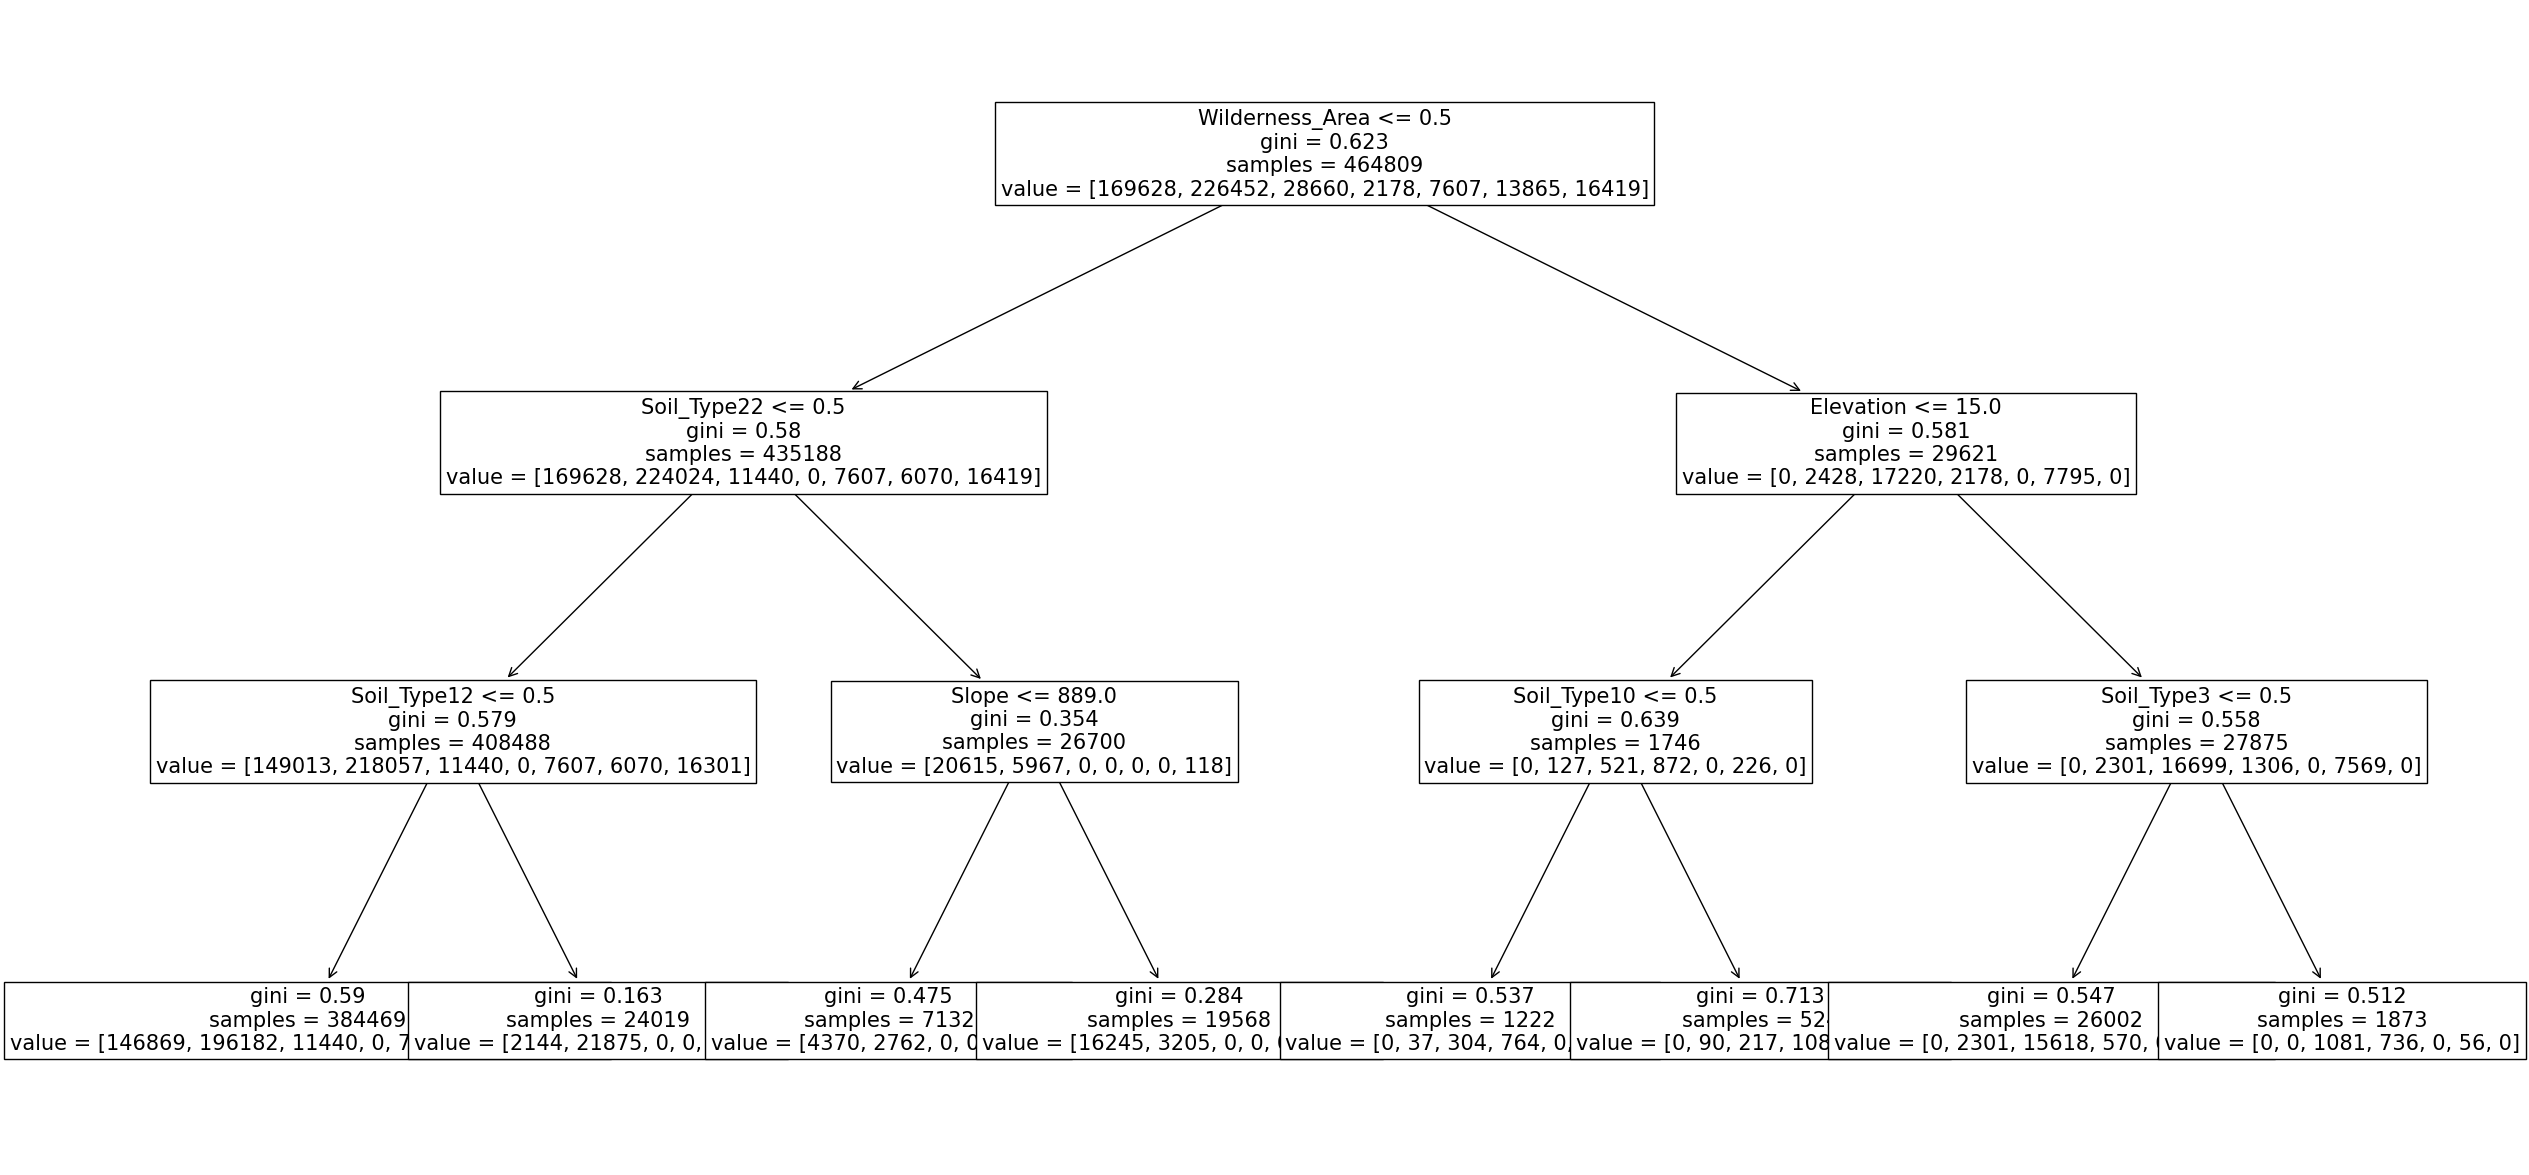

In [ ]:
fig = plt.figure(figsize=(30, 15))
tree.plot_tree(model, feature_names=X_train.columns, fontsize = 15)
plt.show()

In [ ]:
model.get_n_leaves()

8

PART III

---


In [ ]:
for nodes in range(1, 4):
    model = DecisionTreeClassifier(max_depth=nodes)
    sc_train = cross_val_score(model, X_train, y_train)
    sc_test = cross_val_score(model, X_test, y_test)
    print(f'depth: {nodes}')
    print(f'score train: {np.mean(sc_train)}')
    print(f'score test: {np.mean(sc_test)}')

depth: 1
score train: 0.5190174895662926
score test: 0.5205115403434535
depth: 2
score train: 0.5512866580126259
score test: 0.5532129502723871
depth: 3
score train: 0.5515211630586541
score test: 0.5534022767942078


In [ ]:
model1 = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))
print("entropy acc:", acc1)

model2 = DecisionTreeClassifier(max_depth = 3,criterion='gini')
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))
print("gini acc:", acc2)

model3 = DecisionTreeClassifier(max_depth = 3,criterion='log_loss')
model3.fit(X_train, y_train)
acc3 = accuracy_score(y_test, model3.predict(X_test))
print("log loss acc:", acc3)

entropy acc: 0.5407175374129756
gini acc: 0.553522714559865
log loss acc: 0.5407175374129756


PART IV

---


In [ ]:
model = GradientBoostingClassifier(n_estimators=10)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
model.score(X_test, y_test)

0.6373415488412519

Text(0.5, 1.0, 'Feature Importance')

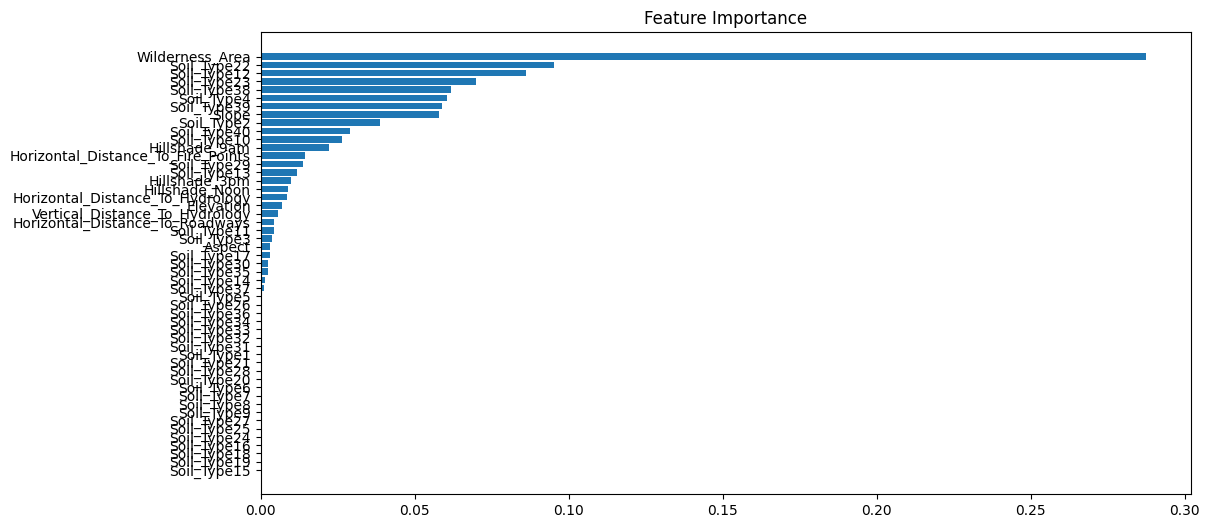

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
for n in range(1, 11):
  model = GradientBoostingClassifier(n_estimators=n)
  sc_train = cross_val_score(model, X_train, y_train)
  sc_test = cross_val_score(model, X_test, y_test)
  print(f'number of trees: {n}')
  print(f'score train: {np.mean(sc_train)}')
  print(f'score test: {np.mean(sc_test)}')

number of trees: 1
score train: 0.49180631212211257
score test: 0.49372219150070196
number of trees: 2
score train: 0.517511493612409
score test: 0.5179556563675639
number of trees: 3
score train: 0.5451701631629353
score test: 0.5348400550513844
number of trees: 4
score train: 0.564418928856595
score test: 0.5663967770619627
number of trees: 5
score train: 0.5936051138741674
score test: 0.598771045012816
number of trees: 6
score train: 0.6199600260105796
score test: 0.6221440094775827
number of trees: 7
score train: 0.6284215656504639
score test: 0.6270233768428561
number of trees: 8
score train: 0.6298952836884822
score test: 0.6288650047274607
number of trees: 9
score train: 0.6340346162848786
score test: 0.6315241589271023
number of trees: 10
score train: 0.6391012266083622
score test: 0.6385205010789807


PART V

---


In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Text(0.5, 1.0, 'Feature Importance')

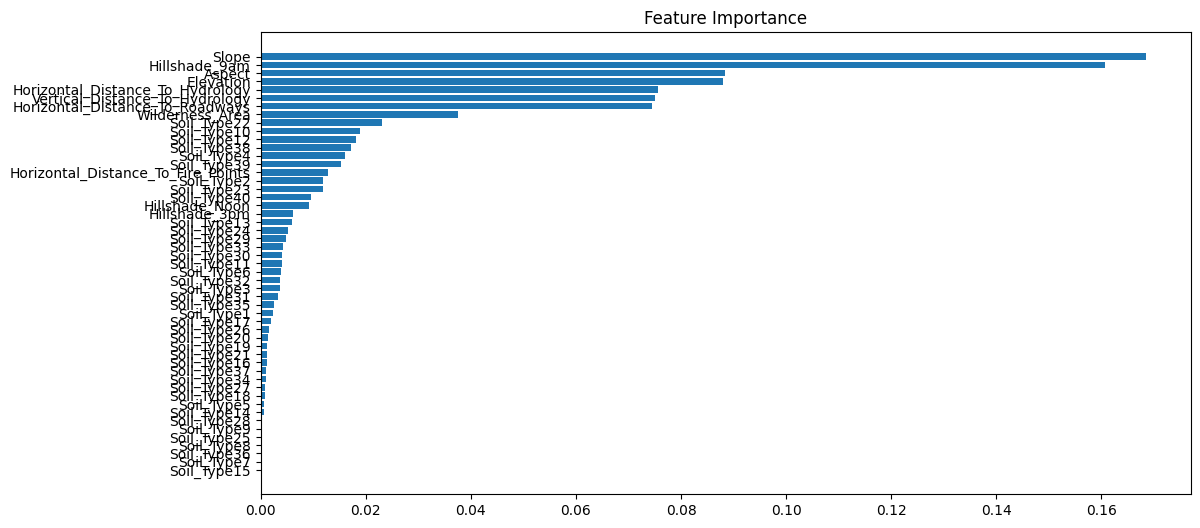

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
model.score(X_test, y_test)

0.9187198265105032

In [ ]:
for n in range(1, 11):
  model = RandomForestClassifier(n_estimators=n)
  sc_train = cross_val_score(model, X_train, y_train)
  sc_test = cross_val_score(model, X_test, y_test)
  print(f'number of trees: {n}')
  print(f'score train: {np.mean(sc_train)}')
  print(f'score test: {np.mean(sc_test)}')

number of trees: 1
score train: 0.8231015135972282
score test: 0.7514693074979295
number of trees: 2
score train: 0.8155844606111996
score test: 0.7510563499086611
number of trees: 3
score train: 0.8750346806274225
score test: 0.8060033221454665
number of trees: 4
score train: 0.878076798363194
score test: 0.8090238713988521
number of trees: 5
score train: 0.8971577595014442
score test: 0.834462083707046
number of trees: 6
score train: 0.8942748490552385
score test: 0.8344879060767216
number of trees: 7
score train: 0.9035001452136269
score test: 0.8437475791528429
number of trees: 8
score train: 0.9053890931100851
score test: 0.844685591839041
number of trees: 9
score train: 0.9104083590280739
score test: 0.8527576380870621
number of trees: 10
score train: 0.911699216227213
score test: 0.85576965554597
